In [17]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np

In [18]:
df = pd.read_csv('../../data processing/preprocessed.csv')


In [19]:
X = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']

In [20]:
from sklearn.model_selection import train_test_split


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [22]:
from sklearn.preprocessing import StandardScaler


In [23]:
scaler = StandardScaler()


In [24]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [25]:
from sklearn.svm import SVC


In [26]:
svc = SVC(probability=True)

In [27]:
svc.fit(scaled_X_train, y_train)

SVC(probability=True)

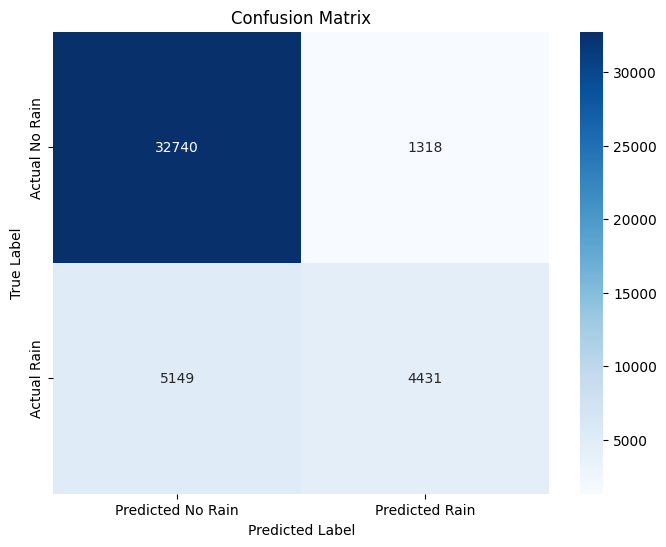

In [29]:
y_pred5 = svc.predict(scaled_X_test)
import seaborn as sns
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,y_pred5)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted No Rain', 'Predicted Rain'],
            yticklabels=['Actual No Rain', 'Actual Rain'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [30]:
from sklearn.metrics import classification_report


print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

       False       0.86      0.96      0.91     34058
        True       0.77      0.46      0.58      9580

    accuracy                           0.85     43638
   macro avg       0.82      0.71      0.74     43638
weighted avg       0.84      0.85      0.84     43638



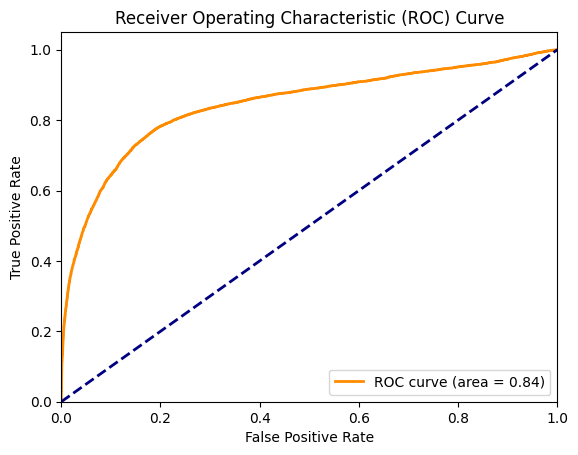

In [31]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = svc.predict_proba(scaled_X_test)

positive_class_proba = y_pred_proba[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, positive_class_proba)

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()